<a href="https://colab.research.google.com/github/rebekahveiga/MLP-Exemplo-de-Neuronio-Linear/blob/main/digitosmlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tflearn
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

# MNIST
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)


# Input Layer
net = tflearn.input_data([None, 784])

# Hidden Layer
net = tflearn.fully_connected(net, 128, activation='reLU')

# Output Layer
net = tflearn.fully_connected(net, 10, activation='softmax')
net = tflearn.regression(net,optimizer='sgd',learning_rate=0.1,loss='mean_square')

# build the model
model = tflearn.DNN(net)

# Training
model.fit(trainX, trainY,validation_set=0.1,show_metric=True, batch_size=100, n_epoch=20)

# Testing
predictions = np.array(model.predict(testX)).argmax(axis=1)
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)
print("Test accuracy: ", test_accuracy)

# Additional libraries
import matplotlib.pyplot as plt # for plots
%matplotlib inline



Training Step: 9899  | total loss: 0.01519 | time: 3.702s
| SGD | epoch: 020 | loss: 0.01519 - acc: 0.8971 -- iter: 49400/49500
Training Step: 9900  | total loss: 0.01556 | time: 4.734s
| SGD | epoch: 020 | loss: 0.01556 - acc: 0.8944 | val_loss: 0.01557 - val_acc: 0.9007 -- iter: 49500/49500
--
Test accuracy:  0.9097


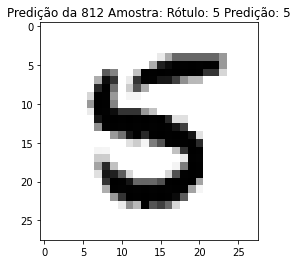

In [ ]:
#funcoes para visualizacao
def display_train(i):
    img = trainX[i]
    actual = trainY.argmax(axis=1)
    plt.title('Example Treinamento %d Label: %d' % (i,actual[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.show()
def display_test(i):
    img = testX[i]
    #plt.title('Example Teste %d. Label: %d' % (i, testY[i]))
    actual = testY.argmax(axis=1)
    plt.title('Example Treinamento %d Label: %d' % (i,actual[i]))
    #plt.title('Example Teste %d. Label: %d' % (i, testY[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.show()
def display_pred(i):
    img = testX[i]
    actual = testY.argmax(axis=1)
    #plt.title('Example Teste %d. Label: %d' % (i, testY[i]))
    #actual = predictions.argmax(axis=1)
    plt.title('Predição da %d Amostra: Rótulo: %d Predição: %d' % (i,actual[i],predictions[i]))
    #plt.title('Example Teste %d. Label: %d' % (i, testY[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.show()

# Visualizar a previsão da amostra i:
display_pred(812)
